# Ground Trugth plotting

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("data.csv",names = ['ax','ay','az','tx','ty','tz','lat','log','alt']).iloc[:,:]
df.head()

,ax,ay,az,tx,ty,tz,lat,log,alt
0,0.509852,-0.079675,-0.391743,-0.023694,0.017333,0.982284,13.017266,77.568062,834
1,0.035350,0.026395,-1.075663,-0.017104,0.015930,0.982316,13.017266,77.568062,834
2,-0.319756,0.144435,-1.012105,-0.016670,0.016476,0.982683,13.017266,77.568062,834
3,-0.525632,0.241057,-0.808975,-0.017458,0.017440,0.983160,13.017266,77.568062,834
4,-0.518909,0.196253,-0.794307,-0.017902,0.017537,0.983691,13.017266,77.568062,834


# Accelaration

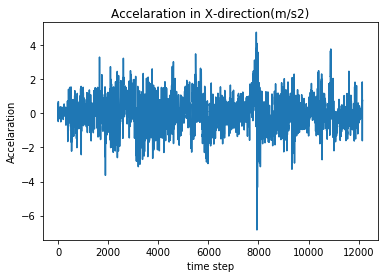

In [3]:
ax = np.array(df['ax']) -df['ax'].mean()
plt.plot(ax)
plt.title("Accelaration in X-direction(m/s2)")
plt.xlabel("time step")
plt.ylabel("Accelaration")
plt.show()

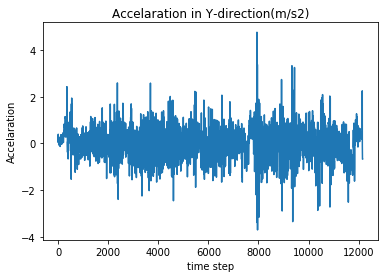

In [4]:
ay = np.array(df['ay']) - df['ay'].mean()
plt.plot(ay)
plt.title("Accelaration in Y-direction(m/s2)")
plt.xlabel("time step")
plt.ylabel("Accelaration")
plt.show()

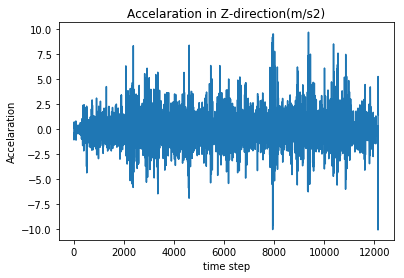

In [5]:
az = np.array(df['az']) - df['az'].mean()
plt.plot(az)
plt.title("Accelaration in Z-direction(m/s2)")
plt.xlabel("time step")
plt.ylabel("Accelaration")
plt.show()

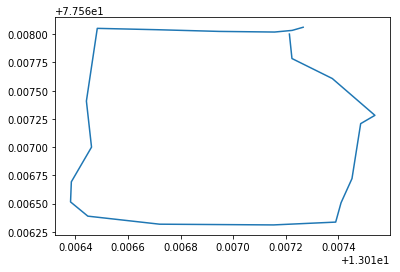

In [6]:
plt.plot(df['lat'],df['log'])

# Velocity 

In [7]:
dt = 0.01
vy = []
v = 0
for i in range(ax.shape[0]):
    v = v + ax[i]*dt
    vy.append(v)
vy = np.array(vy)

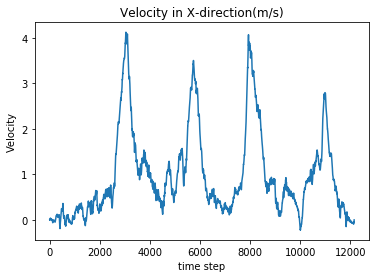

In [8]:
plt.plot(vy)
plt.title("Velocity in X-direction(m/s)")
plt.xlabel("time step")
plt.ylabel("Velocity")
plt.show()

# Displacement and distance

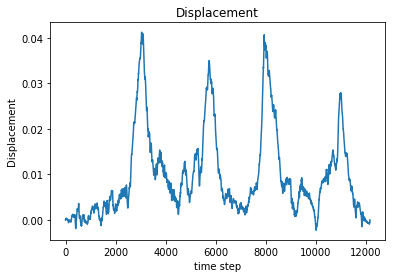

In [9]:
dy = vy * dt
plt.plot(dy)
plt.title("Displacement")
plt.xlabel("time step")
plt.ylabel("Displacement")
plt.show()

In [10]:
dist = []
d = 0
for i in range(ax.shape[0]):
    d = d + dy[i]
    dist.append(d)

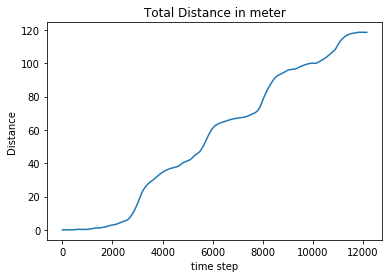

In [11]:
plt.plot(dist)
plt.title("Total Distance in meter")
plt.xlabel("time step")
plt.ylabel("Distance")
plt.show()

# Rotational Vector

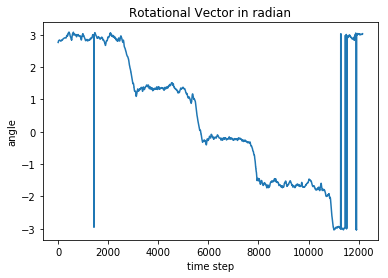

In [12]:
rot_angle = 2 * np.arcsin(np.array(df['tz']))
plt.plot(rot_angle)
plt.title("Rotational Vector in radian")
plt.xlabel("time step")
plt.ylabel("angle")
plt.show()

# Aprox trajectory 

In [13]:
x = 0
y = 0
X = []
Y = []
for i in range(ax.shape[0]-1):
    x = x + dy[i+1] * np.sin(rot_angle[i])
    y = y + dy[i+1] * np.cos(rot_angle[i])
    X.append(x)
    Y.append(y)

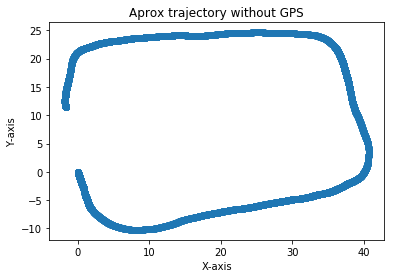

In [14]:
plt.scatter(X,Y)
plt.title("Aprox trajectory without GPS")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Ground truth 

In [15]:
lat = np.array(df['lat']) * math.pi /180.
log = np.array(df['log']) * math.pi /180.
r = 6371000 #+ alt
x = r*np.cos(lat)*np.cos(log)
y = r*np.cos(lat)*np.sin(log)
z = r*np.sin(lat)
x = x - x[0]
y = y - y[0]

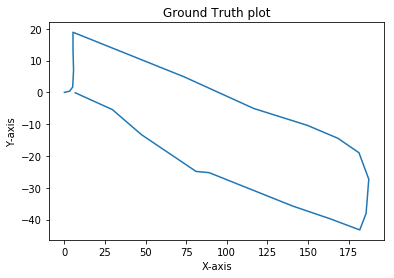

In [16]:
plt.plot(x,y)
plt.title("Ground Truth plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()